# Analiza velikog skupa podataka pomoću programskog jezika <span style="color:#ffd43b">Py</span><span style="color:#306998">thon</span> i razvojnog okružja <span style="color:#F37821">Jupyter</span> <span style="color:#777778">Notebook</span>

### *Big Data Analysis in Python and Jupyter Notebook*

## Završni rad
### Sveučilište u Zagrebu, Fakultet organizacije i informatike

**Student**: Josip Rosandić <br/>
**Smjer studija**: Informacijski sustavi <br/>
**Mentor**: Izv.prof.dr.sc. Markus Schatten 

### Sažetak

<div style="text-align:justify">
Ovaj rad čitatelja uvodi u sferu analize i obrade podataka.  Naglasak rada stavljen je na analizu otvorenog skupa podataka pomoću programskog jezika Python i modula Pandas, a sve unutar razvojnog okružja Jupyter Notebook.  Nad otvorenim skupom podataka u valjanom datotečnom obliku čitljivom unutar korištenih modula provest ́ce se analiza podataka što uključuje analizu količine podataka, tipova podataka, valjanosti podataka, strukture unutar koje su podaci pohranjeni.  Nadalje, rad uključuje i prikaz optimiranja tipova podataka u svrhu postizanjaboljih memorijskih performansi. Zatim slijedi semantička analiza podataka, procesiranje skupa te eksploatiranje nove vrijednosti iz postoje ́cih resursa.  Procesi obrade većinski su dio Python modula Pandas unutar kojega se nalaze metode za čitanje odgovaraju ́ce datoteke skupa podataka, zatim formiranje podatkovnih okvira kao temeljne obradbene strukture ovoga modula te primjene atributa i metoda ovoga modula nad formiranim podatkovnim okvirima.  Novo znanje korisno je vizualizirati korištenjem Python modula Matplotlib.  Fokus rada trebao bi biti sami proces koji, promatramo li ga kao crnu kutiju, kao ulaze prima podatke, a kao izlaze vraća odgovarajuće semantički jasne, egzaktne i precizne izračune i vizualizacije.
</div>

**Izvor podataka:** COVID-19 Data Repository by the Center for Systems Science and Engineering (CSSE) at Johns Hopkins University.<br/> https://github.com/CSSEGISandData/COVID-19.<br/> © Copyright Johns Hopkins University 2020.
 

<hr style="color:Gray">

#### Uvoz potrebnih biblioteka

In [3]:
import pandas as pd #uvoz pandas biblioteke s aliasom "pd"
import numpy as np #uvoz numpy biblioteke s aliasom np
import matplotlib.pyplot as plt #uvoz matplotlib bilbioteke s aliasom plt

## <span style="color:#16a085; font-weight:bolder"> 1. SKUP PODATAKA #1 </span>

Uvoz skupa podataka 

In [4]:
# Skup podataka #1
df_latest_data = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv")

<hr style="border-color:##2c3e50 solid">

### <span style="color:#16a085">1.1. Opis i analiza formata skupa #1</span>

<hr style="border-color:##2c3e50 solid">

U varijablu `df_latest_data`, odnosno u pandas data frame uvezeni su podaci iz `.csv` datoteke `cases_country.csv`. 
Navedeni skup podataka sastoji se od **188 redova** te (inicijalno) **14 stupaca**. Svaki redak predstavlja jednu državu svijeta, a svaki stupac predstavlja atribute svojstvene problemskoj domeni. Tako od inicijalnih atributa, ovaj data frame sadrži:

* `Country_Region` - država ili regija o kojoj se vrijednosti atributa bilježe
* `Last_Update` - obzirom da je ovo skup podataka koji se svakodnevno ažurira unutar CSSE Centra u Baltimoreu, postoji atribut koji prestavlja timestamp kada su podaci posljednji put ažurirani. 
* `Lat` - odnosi se na geografsku širinu lokacije
* `Long_` - odnosi se na geografsku dužinu lokacije
* `Confirmed` - broj potvrđenh slučaja zaraze
* `Deaths` - broj potvrđenih smrtnih slučaja uzrokovanih bolešću COVID19
* `Recovered` - broj slučajeva oporavka oboljelih
* `Active` - broj aktivnih slučajeva (dobije se tako da se od broja potvrđenih oduzme broj umrlih i oporavljenih)
* `Incident rate` - incidencija slučajeva na 100 000 osoba
* `People_Tested` - broj ljudi podvrgnutih testiranju na COVID19
* `People_Hospitalized` - broj ljudi hospitaliziranih uslijed zaraze 
* `Mortality_Rate` - stopa smrtnosti od bolesti COVID19 ((brojUmrlih * 100)/brojPotvrdenih)
* `UID` - identifikator svakog retka
* `ISO3` - službeni identifikator države

In [5]:
# Pomoću varijable ispisujemo data frame skupa #1
df_latest_data

,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,Afghanistan,2020-09-15 10:22:52,33.939110,67.709953,38815.0,1426.0,32098.0,5291.0,99.708847,NaN,NaN,3.673837,4,AFG
1,Albania,2020-09-15 10:22:52,41.153300,20.168300,11520.0,338.0,6615.0,4567.0,400.305789,NaN,NaN,2.934028,8,ALB
2,Algeria,2020-09-15 10:22:52,28.033900,1.659600,48496.0,1620.0,34204.0,12672.0,110.592580,NaN,NaN,3.340482,12,DZA
3,Andorra,2020-09-15 10:22:52,42.506300,1.521800,1438.0,53.0,945.0,440.0,1861.127289,NaN,NaN,3.685675,20,AND
4,Angola,2020-09-15 10:22:52,-11.202700,17.873900,3439.0,136.0,1324.0,1979.0,10.463616,NaN,NaN,3.954638,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,West Bank and Gaza,2020-09-15 10:22:52,31.952200,35.233200,31362.0,226.0,21406.0,9730.0,614.770487,NaN,NaN,0.720617,275,PSE
184,Western Sahara,2020-09-15 10:22:52,24.215500,-12.885800,10.0,1.0,8.0,1.0,1.674116,NaN,NaN,10.000000,732,ESH
185,Yemen,2020-09-15 10:22:52,15.552727,48.516388,2013.0,583.0,1215.0,215.0,6.749152,NaN,NaN,28.961749,887,YEM
186,Zambia,2020-09-15 10:22:52,-13.133897,27.849332,13720.0,320.0,12380.0,1020.0,74.630292,NaN,NaN,2.332362,894,ZMB


<hr style="border-color:##2c3e50 solid">

### <span style="color:#16a085"> 1.2. Tipovi podataka i potrošnja resursa </span>

<hr style="border-color:##2c3e50 solid">

U nastavku vidimo prikaz informacija o data frameu. Kao što je ranije navedeno, radi se o 14 stupaca i 188 redaka što možemo vidjeti i pomoću atributa `shape` u nastavku:

In [6]:
df_latest_data.shape

(188, 14)

Pogledajmo informacije o tipovima podataka prikazane pomoću metode `.info()`

In [7]:
df_latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       188 non-null    object 
 1   Last_Update          188 non-null    object 
 2   Lat                  186 non-null    float64
 3   Long_                186 non-null    float64
 4   Confirmed            188 non-null    float64
 5   Deaths               188 non-null    float64
 6   Recovered            185 non-null    float64
 7   Active               188 non-null    float64
 8   Incident_Rate        186 non-null    float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Mortality_Rate       188 non-null    float64
 12  UID                  188 non-null    int64  
 13  ISO3                 186 non-null    object 
dtypes: float64(10), int64(1), object(3)
memory usage: 20.7+ KB


Vidimo kako su tipovi podataka ne bitno različiti. Dakle, prisutni su float64, int64 te object. Radi se o tomu da pandas prilikom obrade `.csv` datoteke sve cjelobrojne numeričke podatke tipa integer (int64) pretvara u decimalni format tipa float64. Nadalje, object nije vrlo poželjan tip podatka i dobro je pretvoriti ga u specifičan tip podataka gdje god je to moguće. 
 
Unutar pandas biblioteke postoji metoda `infer_objects().dtypes` koja sve tipove podataka pretvara u one tipove koji su prikladni za pojedini skup. 

In [88]:
# Metoda memory_usage() vraća memorijsku veličinu svakog stupca u bajtovima --> ovdje smo dijelili
# s 1e6 kako bismo dobili megabajte
df_latest_data.memory_usage() #/1000000

Index                       6624
Last_Update                 1504
Confirmed                   1504
Deaths                      1504
Recovered                   1504
Active                      1504
Mortality Rate (per 100)    1504
dtype: int64

<hr style="border-color:##2c3e50 solid">

### <span style="color:#16a085"> 1.3. Redukcija i optimizacija skupa #1 </span>

<hr style="border-color:##2c3e50 solid">

Učinimo redukciju i optimizaciju skupa podataka. U nastavku ćemo izbaciti nepotrebne stupe te optimirati data frame na razini tipova podataka. Kao što smo ranije vidjeli, metodom info dolazimo do informacije koja govori kako data frame zauzima oko **20.7+ KB** memorijskog prostora. 

In [9]:
df_latest_data.drop(columns=["Lat","Long_","Incident_Rate","People_Tested","People_Hospitalized","ISO3","UID","Mortality_Rate"],inplace=True)

In [10]:
df_latest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country_Region  188 non-null    object 
 1   Last_Update     188 non-null    object 
 2   Confirmed       188 non-null    float64
 3   Deaths          188 non-null    float64
 4   Recovered       185 non-null    float64
 5   Active          188 non-null    float64
dtypes: float64(4), object(2)
memory usage: 8.9+ KB


Naime, sada možemo vidjeti da smo eliminacijom podataka koji nam nisu nužni pri obradi za oko:

In [11]:
str(((20.7-8.9)/20.7)*100) + "%"

'57.00483091787439%'

što sada iznosi **8.9+ KB**.

Nadalje, bilo bi dobro pozabaviti se tipovima podataka:

In [12]:
#df_latest_data = df_latest_data.rename(columns={"Country_Region": "Country"})
df_latest_data.set_index(keys="Country_Region", inplace=True)

In [13]:
# Parsiranje datuma
df_latest_data["Last_Update"] = pd.to_datetime(df_latest_data["Last_Update"]) 

# Pretvorba u int64
df_latest_data["Confirmed"] = df_latest_data["Confirmed"].astype("int64")
df_latest_data["Deaths"] = df_latest_data["Deaths"].astype("int64")
df_latest_data["Active"] = df_latest_data["Active"].astype("int64")
df_latest_data["Recovered"].fillna(0,inplace = True) # Zamjena nepoznatih vrijednosti eksplicitnim vrijednostima
df_latest_data["Recovered"] = df_latest_data["Recovered"].astype("int64")

In [14]:
df_latest_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, Afghanistan to Zimbabwe
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Last_Update  188 non-null    datetime64[ns]
 1   Confirmed    188 non-null    int64         
 2   Deaths       188 non-null    int64         
 3   Recovered    188 non-null    int64         
 4   Active       188 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 8.8+ KB


Kao što možemo vidjeti, neznatno se smanjila veličina skupa, no ovakva promjene puno su značajnije na velikim skupovima podataka.

<hr style="border-color:##2c3e50 solid">

### <span style="color:#16a085"> 1.4. Modeliranje skupa podataka </span>
**Analiza i obrada**

<hr style="border-color:##2c3e50 solid">

Najnoviji podaci za **Republiku Hrvatsku**:

In [15]:
cro_newest = pd.DataFrame(df_latest_data.loc["Croatia"])
cro_newest

,Croatia
Last_Update,2020-09-15 10:22:52
Confirmed,13749
Deaths,230
Recovered,11412
Active,2107


Pomoću metode `.head()` prikažimo prvih nekoliko redova skupa:

In [89]:
df_latest_data.tail(10)

,Last_Update,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
Country_Region,,,,,,
United Kingdom,2020-09-15 10:22:52,373555,41726,2152,329677,11.17
Uruguay,2020-09-15 10:22:52,1812,45,1528,239,2.48
Uzbekistan,2020-09-15 10:22:52,48192,400,44526,3266,0.83
Venezuela,2020-09-15 10:22:52,61569,494,49371,11704,0.80
Vietnam,2020-09-15 10:22:52,1063,35,926,102,3.29
West Bank and Gaza,2020-09-15 10:22:52,31362,226,21406,9730,0.72
Western Sahara,2020-09-15 10:22:52,10,1,8,1,10.00
Yemen,2020-09-15 10:22:52,2013,583,1215,215,28.96
Zambia,2020-09-15 10:22:52,13720,320,12380,1020,2.33


U nastavku ćemo nad skupom ćemo neke od statističkih metoda pandas biblioteke:

* `sum()`
* `count()`
* `median()`
* `min()`
* `max()`

In [17]:
df_latest_data["Confirmed"].sum()

29303757

In [18]:
df_latest_data["Confirmed"].count()

188

In [19]:
df_latest_data["Confirmed"].median()

10015.0

In [20]:
# Država s najmanje potvrđenih slučajeva u ovom slučaju nije država nego kruzer MS Zaandam
df_latest_data["Confirmed"].min()
df_latest_data[df_latest_data["Confirmed"] == df_latest_data["Confirmed"].min()]

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
MS Zaandam,2020-09-15 10:22:52,9,2,0,7


In [21]:
# Država s najviše potvrđenih slučajeva jesu Sjedinjene Američke Države
df_latest_data["Confirmed"].max()
df_latest_data[df_latest_data["Confirmed"] == df_latest_data["Confirmed"].max()]

,Last_Update,Confirmed,Deaths,Recovered,Active
Country_Region,,,,,
US,2020-09-15 10:22:52,6555243,194545,2474570,3890887


In [22]:
# Medijalna vrijednost broja potvrđenih slučajeva koja nam tumači kako polovica država ima manje od 
# 9054 potvrđena slučaja, dok polovica država ima više potvrđenih slučajeva 
df_latest_data["Confirmed"].median() 

10015.0

Pozovimo metodu `.describe()` koja će nam za svaki stupac prikazati osnovne metrike deskriptivne statistike:

In [23]:
df_latest_data.describe().astype("float").round(2)

,Confirmed,Deaths,Recovered,Active
count,188.00,188.00,188.00,188.00
mean,155871.05,4941.29,105746.94,45205.23
std,682509.16,19483.34,441635.75,296515.10
min,9.00,0.00,0.00,0.00
25%,2242.25,38.75,1214.50,362.50
50%,10015.00,210.00,6654.00,1979.00
75%,65744.50,1132.00,44223.00,11065.75
max,6555243.00,194545.00,3859399.00,3890887.00


Promotrimo sada nekoliko **vršnih vrijednosti** po svakom od atributa:

In [24]:
# Prikaz 10 država s najmanjim brojem potvrđenih slučajeva 
pd.DataFrame(df_latest_data.sort_values("Confirmed")["Confirmed"].head(10))

,Confirmed
Country_Region,
MS Zaandam,9
Western Sahara,10
Holy See,12
Saint Kitts and Nevis,17
Laos,23
Dominica,24
Grenada,24
Timor-Leste,27
Saint Lucia,27


In [25]:
# Prikaz 10 država s najvećim brojem potvrđenih slučajeva 
pd.DataFrame(df_latest_data.sort_values("Confirmed", ascending=False)["Confirmed"].head(10))

,Confirmed
Country_Region,
US,6555243
India,4930236
Brazil,4345610
Russia,1069873
Peru,729619
Colombia,721892
Mexico,671716
South Africa,650749
Spain,593730


In [26]:
# Prikaz 10 država s najmanjim brojem smrtnih slučajeva 
pd.DataFrame(df_latest_data.sort_values("Deaths")["Deaths"].head(10))

,Deaths
Country_Region,
Saint Lucia,0
Holy See,0
Cambodia,0
Saint Vincent and the Grenadines,0
Timor-Leste,0
Saint Kitts and Nevis,0
Bhutan,0
Grenada,0
Laos,0


In [27]:
# Prikaz 10 država s najvećim brojem smrtnih slučajeva 
pd.DataFrame(df_latest_data.sort_values("Deaths", ascending=False)["Deaths"].head(10))

,Deaths
Country_Region,
US,194545
Brazil,132006
India,80776
Mexico,71049
United Kingdom,41726
Italy,35624
France,30958
Peru,30710
Spain,29848


Pristupimo sada podskupu država koje imaju **manje potvrđenih slučajeva od medijalne vrijednosti**: (GRAF 1.5.)  

In [28]:
median_less = df_latest_data[df_latest_data["Confirmed"] < df_latest_data["Confirmed"].median()]["Confirmed"]

In [29]:
median_less = pd.DataFrame(median_less)
median_less["Confirmed"].sort_values()

Country_Region
MS Zaandam                  9
Western Sahara             10
Holy See                   12
Saint Kitts and Nevis      17
Laos                       23
                         ... 
Finland                  8725
Tajikistan               9088
Maldives                 9243
Namibia                  9818
Malaysia                 9969
Name: Confirmed, Length: 94, dtype: int64

In [30]:
pd.DataFrame(median_less).describe()

,Confirmed
count,94.000000
mean,2876.319149
std,2718.341241
min,9.000000
25%,478.750000
50%,2217.500000
75%,4697.250000
max,9969.000000


Sumarni prikaz vrijednosti svih relevantnih atributa u retku data framea:

In [31]:
df_summary = pd.DataFrame(pd.to_numeric(df_latest_data.sum()),dtype=np.float64).T
df_summary["Mortality Rate (per 100)"] =  (100*df_summary["Deaths"]/df_summary["Confirmed"]).round(2)
df_summary.style.background_gradient(cmap='Reds',axis=1).format("{:.2f}").format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
0,29303757,928963,19880425,8498584,3.17


Prikaz vrijednosti atributa sortiranih po **broju potvrđenih slučajeva**.

In [32]:
df_latest_data["Mortality Rate (per 100)"] = np.round(100*df_latest_data["Deaths"]/df_latest_data["Confirmed"],2)
#df_latest_data.drop(columns="Last_Update",inplace=True)
df_latest_data.sort_values(["Confirmed"], ascending= False).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Reds',subset=["Deaths"])\
                        .background_gradient(cmap='Greens',subset=["Recovered"])\
                        .background_gradient(cmap='Purples',subset=["Active"])\
                        .background_gradient(cmap='YlOrBr',subset=["Mortality Rate (per 100)"])\
                        .format("{:.2f}")\
                        .format("{:.0f}",subset=["Confirmed","Deaths","Recovered","Active"])

,Last_Update,Confirmed,Deaths,Recovered,Active,Mortality Rate (per 100)
Country_Region,,,,,,
US,.2f,6555243,194545,2474570,3890887,2.97
India,.2f,4930236,80776,3859399,990061,1.64
Brazil,.2f,4345610,132006,3770138,443466,3.04
Russia,.2f,1069873,18723,881693,169457,1.75
Peru,.2f,729619,30710,573364,125545,4.21
Colombia,.2f,721892,23123,606925,91844,3.20
Mexico,.2f,671716,71049,564053,36614,10.58
South Africa,.2f,650749,15499,579289,55961,2.38
Spain,.2f,593730,29848,150376,413506,5.03


<hr style="border-color:##2c3e50 solid">

### <span style="color:#16a085"> 1.4.1. Grafičke vizualizacije </span>

<hr style="border-color:##2c3e50 solid">

###  <span style="color:#16a085"> GRAF 1.1. </span>
**Grafička vizualizacija koja prikazuje 10 država s najvećim brojem potvrđenih slučajeva**:

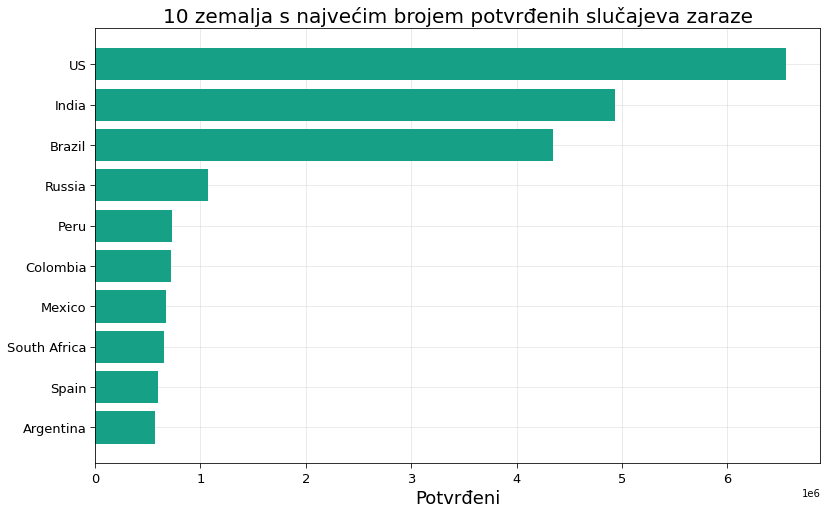

In [33]:
f = plt.figure(figsize=(13,8))
f.add_subplot(1,1,1)

plt.axes(axisbelow=True) #grid osi ispod grafikona
plt.barh(df_latest_data.sort_values('Confirmed')["Confirmed"].index[-10:],df_latest_data.sort_values('Confirmed')["Confirmed"].values[-10:],color="#16a085")
plt.tick_params(size=5,labelsize = 13) #veličina labela kontrolnih točaka
plt.xlabel("Potvrđeni",fontsize=18)
plt.title("10 zemalja s najvećim brojem potvrđenih slučajeva zaraze",fontsize=20)
plt.grid(alpha=0.3,which='both')

### <span style="color:#16a085"> GRAF 1.2 </span>
**Grafička vizualizacija koja prikazuje 10 država s najvećim brojem smrtnih slučajeva**:

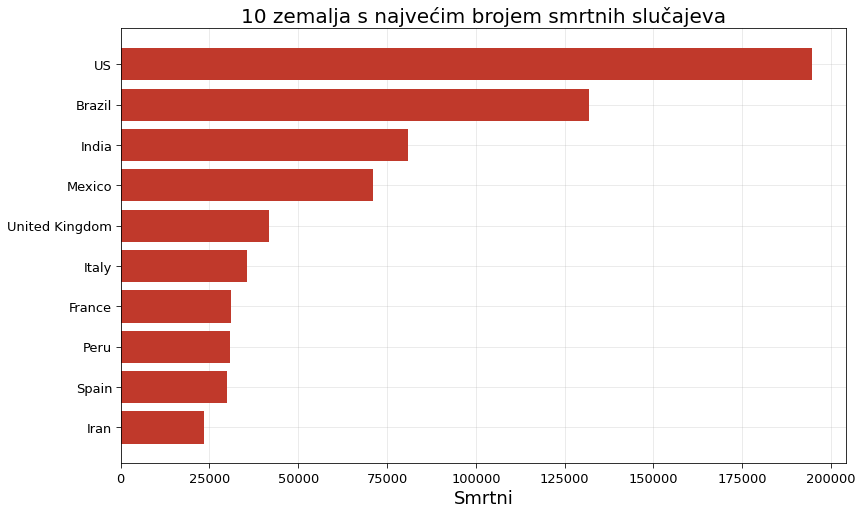

In [34]:
f = plt.figure(figsize=(13,8))
f.add_subplot(1,1,1)

plt.axes(axisbelow=True)
plt.barh(df_latest_data.sort_values('Deaths')["Deaths"].index[-10:],df_latest_data.sort_values('Deaths')["Deaths"].values[-10:],color="#c0392b")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Smrtni",fontsize=18)
plt.title("10 zemalja s najvećim brojem smrtnih slučajeva",fontsize=20)
plt.grid(alpha=0.3,which='both')

### <span style="color:#16a085"> GRAF 1.3. </span>
**Grafička vizualizacija koja prikazuje 10 država s najvećim brojem aktivnih slučajeva**:

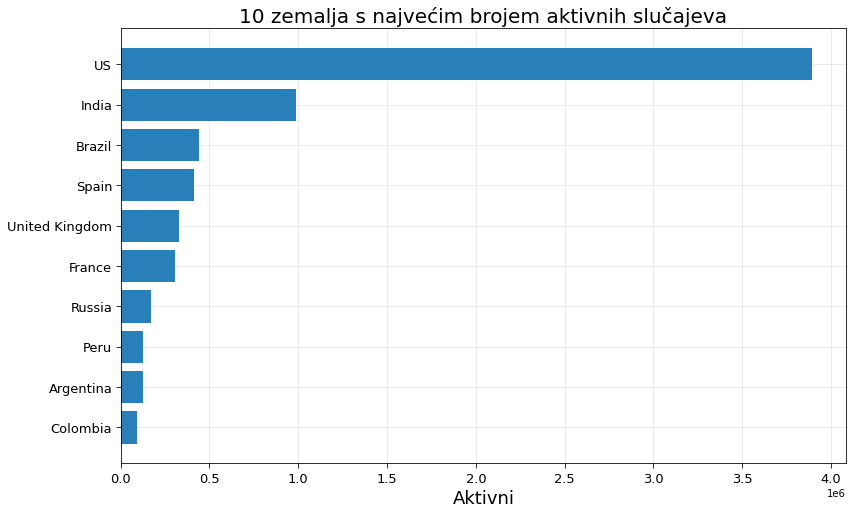

In [35]:
f = plt.figure(figsize=(13,8))
f.add_subplot(1,1,1)

plt.axes(axisbelow=True)
plt.barh(df_latest_data.sort_values('Active')["Active"].index[-10:],df_latest_data.sort_values('Active')["Active"].values[-10:],color="#2980b9")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Aktivni",fontsize=18)
plt.title("10 zemalja s najvećim brojem aktivnih slučajeva",fontsize=20)
plt.grid(alpha=0.3,which='both')

### <span style="color:#16a085"> GRAF 1.4 </span>
**Grafička vizualizacija koja prikazuje top 10 država s najvećim brojem oporavljenih slučajeva**:

In [36]:
df_latest_data.sort_values('Recovered')["Recovered"].index[-10:]

Index(['Chile', 'Argentina', 'Mexico', 'Peru', 'South Africa', 'Colombia',
       'Russia', 'US', 'Brazil', 'India'],
      dtype='object', name='Country_Region')

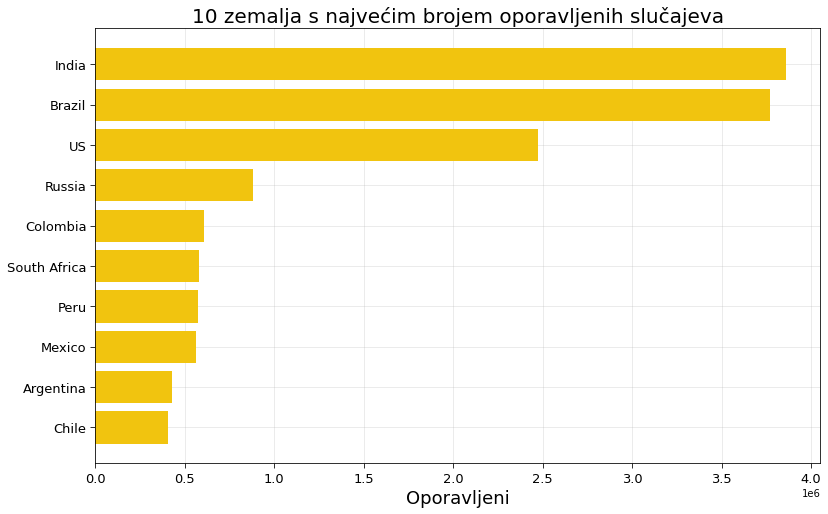

In [37]:
f = plt.figure(figsize=(13,8))
f.add_subplot(1,1,1)

plt.axes(axisbelow=True)
plt.barh(df_latest_data.sort_values('Recovered')["Recovered"].index[-10:],df_latest_data.sort_values('Recovered')["Recovered"].values[-10:],color="#f1c40f")
plt.tick_params(size=5,labelsize = 13)
plt.xlabel("Oporavljeni",fontsize=18)
plt.title("10 zemalja s najvećim brojem oporavljenih slučajeva",fontsize=20)
plt.grid(alpha=0.3,which='both')

### <span style="color:#16a085"> GRAF 1.5 </span>
**Grafička vizualizacija koja prikazuje 30 država s najvišom stopom oporavljenih slučajeva**:

In [38]:
recov_rate = (100*df_latest_data["Recovered"]/df_latest_data["Confirmed"]).sort_values(ascending=False).head(30)
pd.DataFrame(recov_rate).style.background_gradient(cmap='Blues')

,0
Country_Region,
Saint Kitts and Nevis,100.000000
Holy See,100.000000
Grenada,100.000000
Cambodia,99.636364
Singapore,98.806707
Djibouti,98.795404
Ghana,97.978115
Belarus,97.645239
Qatar,97.504407


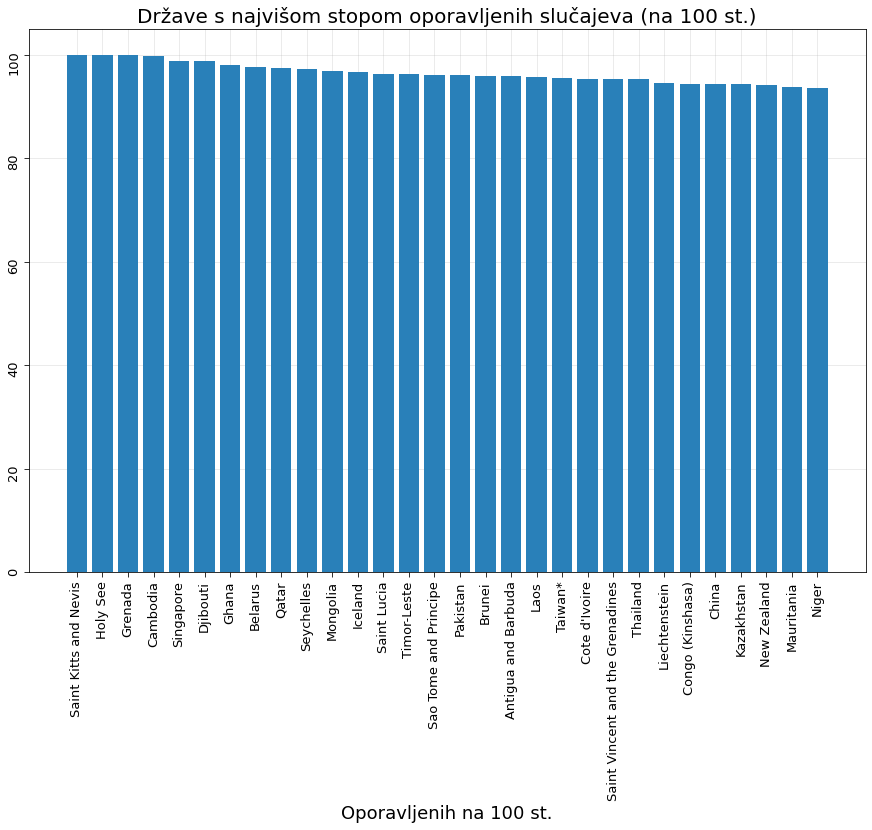

In [39]:
f = plt.figure(figsize=(15,10))
f.add_subplot(1,1,1)

plt.axes(axisbelow=True)
plt.bar(recov_rate.index,recov_rate.values,color="#2980b9")
plt.tick_params(size=5,labelsize = 13, rotation=90)
plt.xlabel("Oporavljenih na 100 st.",fontsize=18)
plt.title("Države s najvišom stopom oporavljenih slučajeva (na 100 st.)",fontsize=20)
plt.grid(alpha=0.3,which='both')

<hr style="border-color:##2c3e50 solid">

## <span style="color:#c0392b;font-weight:bolder"> 2. SKUP PODATAKA #2 </span>

<hr style="border-color:##2c3e50 solid">

Uvoz skupa podataka

In [40]:
# Skup podataka #2
df_countries_dates = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_time.csv",low_memory=False)

<hr style="border-color:##2c3e50 solid">

### <span style="color:#c0392b"> 2.1. Opis i analiza formata skupa #1 </span>

<hr style="border-color:##2c3e50 solid">

U varijablu `df_countries_dates`, odnosno u pandas data frame uvezeni su podaci iz `.csv` datoteke `cases_time.csv`. 
Navedeni skup podataka sastoji se od **55596+ redova** što je varijabilno budući da se broj povećava svakim danom nakon ažuriranja podataka te (inicijalno) **17 stupaca**. Data frame sadrži podatke o vrijednostima najrelevantnijih atributa po svakoj promatranoj državi od početka mjerenja, dakle 22. siječnja 2020. godine pa nadalje.  Od inicijalnih atributa, ovaj data frame sadrži:

* `Country_Region` - država ili regija o kojoj se vrijednosti atributa bilježe
* `Last_Update` - obzirom da je ovo skup podataka koji se svakodnevno ažurira unutar CSSE Centra u Baltimoreu, postoji atribut koji prestavlja timestamp kada su podaci posljednji put ažurirani. 
* `Confirmed` - broj potvrđenh slučaja zaraze
* `Deaths` - broj potvrđenih smrtnih slučaja uzrokovanih bolešću COVID19
* `Recovered` - broj slučajeva oporavka oboljelih
* `Active` - broj aktivnih slučajeva (dobije se tako da se od broja potvrđenih oduzme broj umrlih i oporavljenih)
* `Incident rate` - incidencija slučajeva na 100 000 osoba
* `People_Tested` - broj ljudi podvrgnutih testiranju na COVID19
* `People_Hospitalized` - broj ljudi hospitaliziranih uslijed zaraze 
* `UID` - identifikator svakog retka
* `ISO3` - službeni identifikator države

i ostalih stupaca koji nisu relevantni u daljnjoj obradi.


In [41]:
df_countries_dates

,Country_Region,Last_Update,Confirmed,Deaths,Recovered,Active,Delta_Confirmed,Delta_Recovered,Incident_Rate,People_Tested,People_Hospitalized,Province_State,FIPS,UID,iso3,Report_Date_String,Delta_Deaths
0,Afghanistan,1/22/20,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020/01/22,0.0
1,Afghanistan,1/23/20,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020/01/23,0.0
2,Afghanistan,1/24/20,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020/01/24,0.0
3,Afghanistan,1/25/20,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020/01/25,0.0
4,Afghanistan,1/26/20,0,0,NaN,NaN,0.0,NaN,0.000000,NaN,NaN,NaN,NaN,4,AFG,2020/01/26,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58297,US,9/10/20,4199,42,NaN,NaN,47.0,NaN,60617.872095,NaN,NaN,Wyoming,56.0,84000056,USA,2020/09/10,0.0
58298,US,9/11/20,4264,42,NaN,NaN,65.0,NaN,61556.229248,NaN,NaN,Wyoming,56.0,84000056,USA,2020/09/11,0.0
58299,US,9/12/20,4297,42,NaN,NaN,33.0,NaN,62032.625956,NaN,NaN,Wyoming,56.0,84000056,USA,2020/09/12,0.0
58300,US,9/13/20,4346,42,NaN,NaN,49.0,NaN,62740.002887,NaN,NaN,Wyoming,56.0,84000056,USA,2020/09/13,0.0


<hr style="border-color:##2c3e50 solid">

### <span style="color:#c0392b">2.2. Tipovi podataka i potrošnja resursa
    
<hr style="border-color:##2c3e50 solid">

U nastavku vidimo prikaz informacija o data frameu. Kao što je ranije navedeno, radi se o trenutno 55350 redaka i 17 stupaca što možemo vidjeti i pomoću atributa `shape` u nastavku:

In [42]:
df_countries_dates.shape

(58302, 17)

In [43]:
df_countries_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58302 entries, 0 to 58301
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country_Region       58302 non-null  object 
 1   Last_Update          58302 non-null  object 
 2   Confirmed            58302 non-null  int64  
 3   Deaths               58302 non-null  int64  
 4   Recovered            0 non-null      float64
 5   Active               0 non-null      float64
 6   Delta_Confirmed      58222 non-null  float64
 7   Delta_Recovered      0 non-null      float64
 8   Incident_Rate        57117 non-null  float64
 9   People_Tested        0 non-null      float64
 10  People_Hospitalized  0 non-null      float64
 11  Province_State       13746 non-null  object 
 12  FIPS                 13746 non-null  float64
 13  UID                  58302 non-null  int64  
 14  iso3                 57828 non-null  object 
 15  Report_Date_String   58302 non-null 

Nadalje, možemo vidjeti kako je tip podatka pretežno decimalni tip `float64`, zatim `object` kao tekstualni tip u pandasu te `int64`. Sami tip `object` bilo bi dobro izbjegavati kad god je to moguće te podatke pretvoriti u originalni, egzaktan tip podatka kao što su primjerice int ili datetime. Data frame, odnosno podaci zauzimaju **7.2+ MB** što će u nastavku biti optimizirano za potrebe obrade.

In [44]:
# Metoda memory_usage() vraća memorijsku veličinu svakog stupca u bajtovima --> ovdje smo dijelili
# s 1e6 kako bismo dobili megabajte
df_countries_dates.memory_usage()/1000000

Index                  0.000128
Country_Region         0.466416
Last_Update            0.466416
Confirmed              0.466416
Deaths                 0.466416
Recovered              0.466416
Active                 0.466416
Delta_Confirmed        0.466416
Delta_Recovered        0.466416
Incident_Rate          0.466416
People_Tested          0.466416
People_Hospitalized    0.466416
Province_State         0.466416
FIPS                   0.466416
UID                    0.466416
iso3                   0.466416
Report_Date_String     0.466416
Delta_Deaths           0.466416
dtype: float64

<hr style="border-color:##2c3e50 solid">

### <span style="color:#c0392b">2.3. Redukcija i optimizacija skupa #2
    
<hr style="border-color:##2c3e50 solid">

Učinimo redukciju i optimizaciju skupa podataka. U nastavku ćemo izbaciti nepotrebne stupe te optimirati data frame na razini tipova podataka. Kao što smo ranije vidjeli, metodom info dolazimo do informacije koja govori kako data frame zauzima oko **20.7+ KB** memorijskog prostora. 

In [45]:
df_countries_dates.drop(columns=["Delta_Confirmed","Delta_Recovered","Incident_Rate","People_Tested","People_Hospitalized","iso3","UID","Province_State","FIPS","Report_Date_String","Delta_Deaths","Active","Recovered"],inplace=True)

In [46]:
df_countries_dates["Last_Update"] = pd.to_datetime(df_countries_dates["Last_Update"])

In [47]:
df_countries_dates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58302 entries, 0 to 58301
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country_Region  58302 non-null  object        
 1   Last_Update     58302 non-null  datetime64[ns]
 2   Confirmed       58302 non-null  int64         
 3   Deaths          58302 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 1.8+ MB


Naime, samim izbacivanjem nekoliko stupaca iz ovoga data frame, zauzeće memorije znatno se smanjilo na **1.7+ MB**.

<hr style="border-color:##2c3e50 solid">

### <span style="color:#c0392b">2.4. Modeliranje skupa podataka</span>
**Analiza i obrada**
    
<hr style="border-color:##2c3e50 solid">

### <span style="color:#c0392b">GRAF 2.1.</span>
**Usporedba kretanja broja potvrđenih slučajeva država regije**

In [48]:
# Podaci o potvrđenim slučajevima u Hrvatskoj počevši s 22. siječnja
df_croatia = df_countries_dates[df_countries_dates["Country_Region"] == "Croatia"]
df_croatia

,Country_Region,Last_Update,Confirmed,Deaths
10191,Croatia,2020-01-22,0,0
10192,Croatia,2020-01-23,0,0
10193,Croatia,2020-01-24,0,0
10194,Croatia,2020-01-25,0,0
10195,Croatia,2020-01-26,0,0
...,...,...,...,...
10423,Croatia,2020-09-10,12917,208
10424,Croatia,2020-09-11,13107,211
10425,Croatia,2020-09-12,13368,218
10426,Croatia,2020-09-13,13533,224


In [49]:
# Podaci o potvrđenim slučajevima u Srbiji počevši s 22. siječnja
df_srb = df_countries_dates[df_countries_dates["Country_Region"] == "Serbia"]
df_srb

,Country_Region,Last_Update,Confirmed,Deaths
35313,Serbia,2020-01-22,0,0
35314,Serbia,2020-01-23,0,0
35315,Serbia,2020-01-24,0,0
35316,Serbia,2020-01-25,0,0
35317,Serbia,2020-01-26,0,0
...,...,...,...,...
35545,Serbia,2020-09-10,32136,729
35546,Serbia,2020-09-11,32228,730
35547,Serbia,2020-09-12,32300,731
35548,Serbia,2020-09-13,32408,733


In [50]:
# Podaci o potvrđenim slučajevima u Bosni i Hercegovini počevši s 22. siječnja
df_bih = df_countries_dates[df_countries_dates["Country_Region"] == "Bosnia and Herzegovina"]
df_bih

,Country_Region,Last_Update,Confirmed,Deaths
4977,Bosnia and Herzegovina,2020-01-22,0,0
4978,Bosnia and Herzegovina,2020-01-23,0,0
4979,Bosnia and Herzegovina,2020-01-24,0,0
4980,Bosnia and Herzegovina,2020-01-25,0,0
4981,Bosnia and Herzegovina,2020-01-26,0,0
...,...,...,...,...
5209,Bosnia and Herzegovina,2020-09-10,22544,680
5210,Bosnia and Herzegovina,2020-09-11,22834,686
5211,Bosnia and Herzegovina,2020-09-12,23138,690
5212,Bosnia and Herzegovina,2020-09-13,23465,696


In [51]:
# Podaci o potvrđenim slučajevima u Crnoj Gori počevši s 22. siječnja
df_mne = df_countries_dates[df_countries_dates["Country_Region"] == "Montenegro"]
df_mne

,Country_Region,Last_Update,Confirmed,Deaths
27729,Montenegro,2020-01-22,0,0
27730,Montenegro,2020-01-23,0,0
27731,Montenegro,2020-01-24,0,0
27732,Montenegro,2020-01-25,0,0
27733,Montenegro,2020-01-26,0,0
...,...,...,...,...
27961,Montenegro,2020-09-10,6222,114
27962,Montenegro,2020-09-11,6385,115
27963,Montenegro,2020-09-12,6530,118
27964,Montenegro,2020-09-13,6712,120


In [52]:
# Podaci o potvrđenim slučajevima u Mađarskoj počevši s 22. siječnja
df_hun = df_countries_dates[df_countries_dates["Country_Region"] == "Hungary"]
df_hun

,Country_Region,Last_Update,Confirmed,Deaths
18249,Hungary,2020-01-22,0,0
18250,Hungary,2020-01-23,0,0
18251,Hungary,2020-01-24,0,0
18252,Hungary,2020-01-25,0,0
18253,Hungary,2020-01-26,0,0
...,...,...,...,...
18481,Hungary,2020-09-10,10191,630
18482,Hungary,2020-09-11,10909,631
18483,Hungary,2020-09-12,11825,633
18484,Hungary,2020-09-13,12309,637


In [53]:
# Podaci o potvrđenim slučajevima u Sloveniji počevši s 22. siječnja
df_slo = df_countries_dates[df_countries_dates["Country_Region"] == "Slovenia"]
df_slo

,Country_Region,Last_Update,Confirmed,Deaths
36498,Slovenia,2020-01-22,0,0
36499,Slovenia,2020-01-23,0,0
36500,Slovenia,2020-01-24,0,0
36501,Slovenia,2020-01-25,0,0
36502,Slovenia,2020-01-26,0,0
...,...,...,...,...
36730,Slovenia,2020-09-10,3389,135
36731,Slovenia,2020-09-11,3497,135
36732,Slovenia,2020-09-12,3603,135
36733,Slovenia,2020-09-13,3702,135


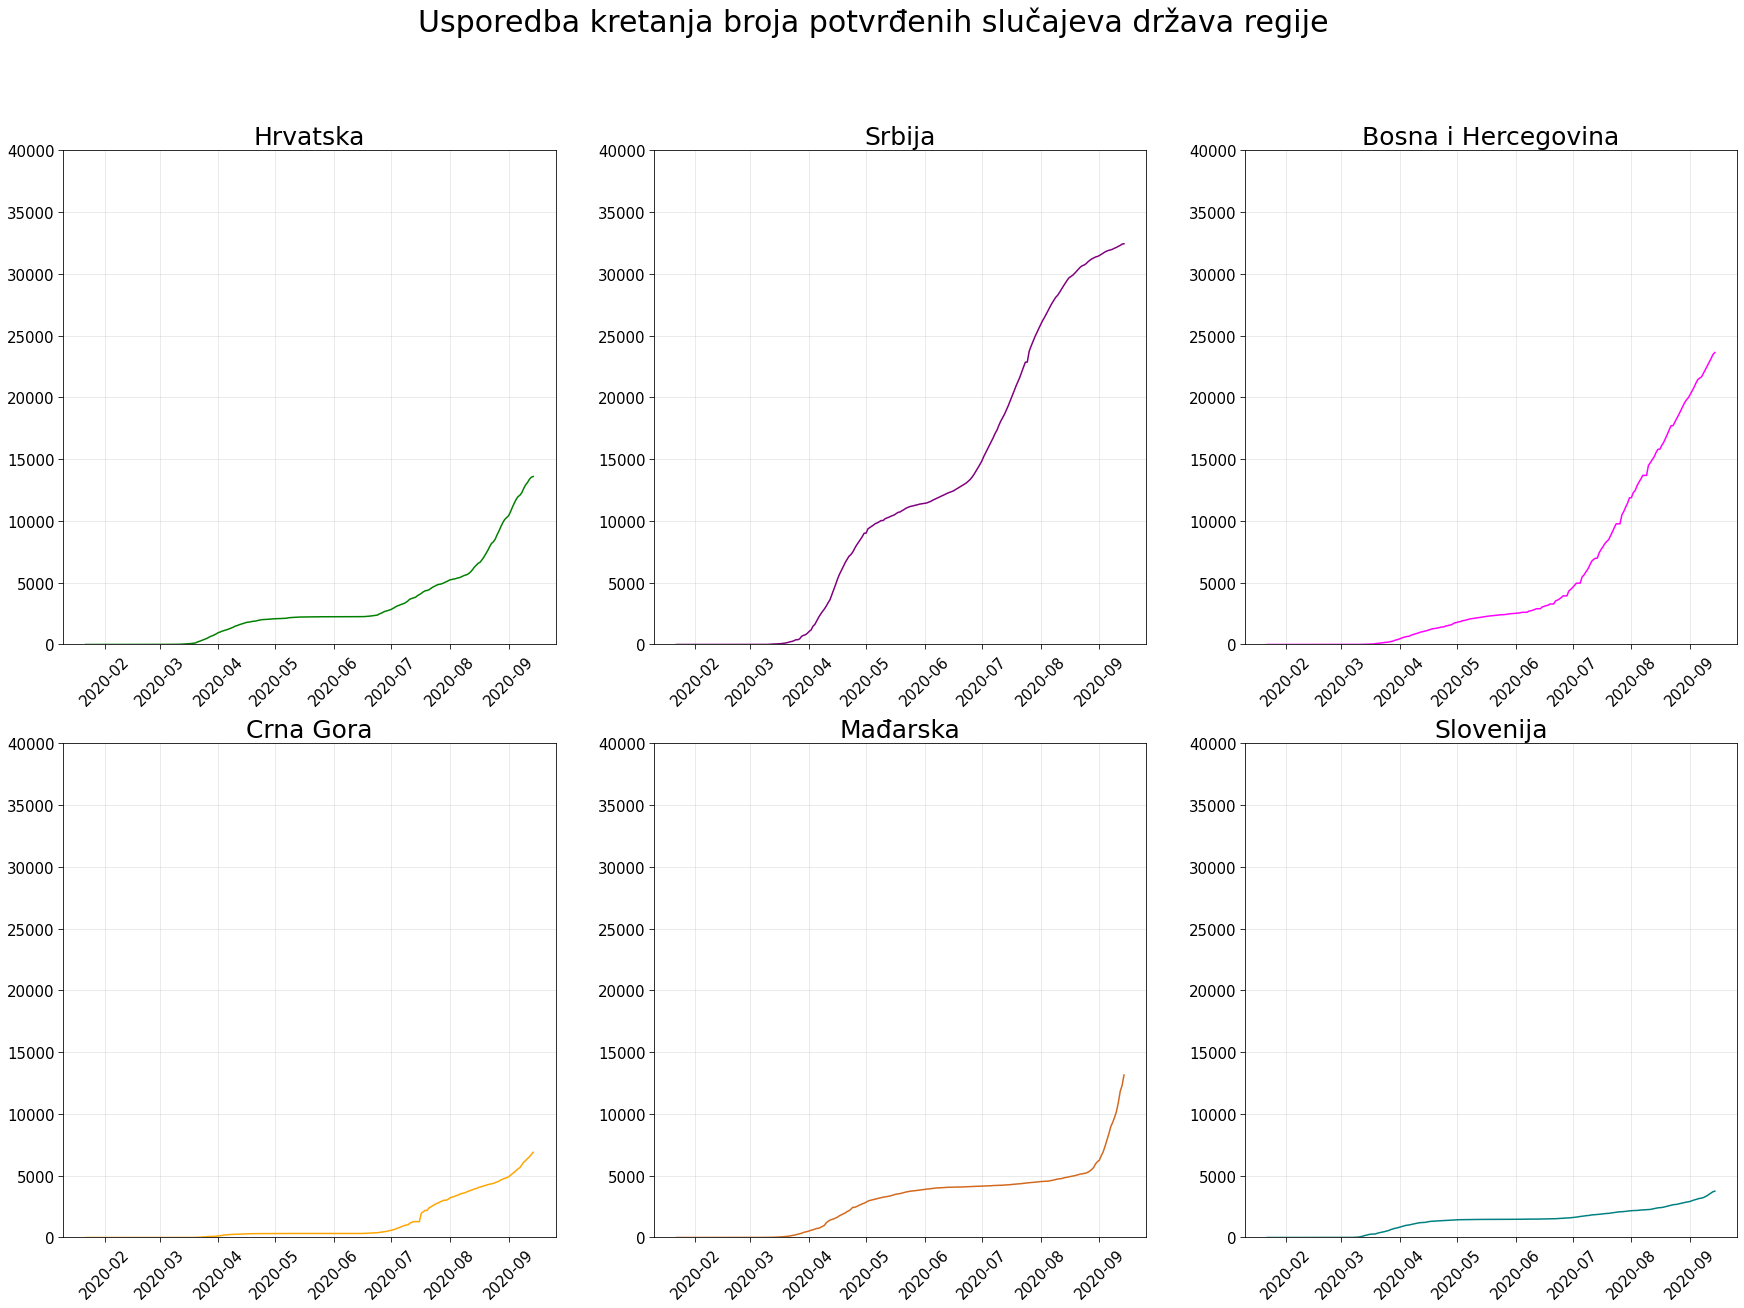

In [54]:
# Kreiranje grafikona
fig = plt.figure(figsize=(30,20))

fig.suptitle('Usporedba kretanja broja potvrđenih slučajeva država regije', 
             fontsize=30)

# Podgraf 1
ax1 = fig.add_subplot(231)
ax1.set_title('Hrvatska',fontsize=25)
ax1.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax1.plot(df_croatia['Last_Update'],
         df_croatia["Confirmed"], 
         color='green')

# Podgraf 2
ax2 = fig.add_subplot(232)
ax2.set_title('Srbija',fontsize=25)
ax2.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax2.plot(df_srb['Last_Update'],
         df_srb['Confirmed'], 
         color='purple')

# Podgraf 3
ax3 = fig.add_subplot(233)
ax3.set_title('Bosna i Hercegovina',fontsize=25)
ax3.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax3.plot(df_bih['Last_Update'],
         df_bih['Confirmed'], 
         color='magenta')

# Podgraf 4
ax4 = fig.add_subplot(234)
ax4.set_title('Crna Gora',fontsize=25)
ax4.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax4.plot(df_mne['Last_Update'],
         df_mne['Confirmed'], 
         color='orange')

# Podgraf 5
ax5 = fig.add_subplot(235)
ax5.set_title('Mađarska',fontsize=25)
ax5.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax5.plot(df_hun["Last_Update"],
         df_hun["Confirmed"], 
         color='chocolate')

# Podgraf 6
ax6 = fig.add_subplot(236)
ax6.set_title('Slovenija',fontsize=25)
ax6.set_ylim(0,40000)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax6.plot(df_slo["Last_Update"],
         df_slo["Confirmed"], 
         color='teal')


plt.show()

### <span style="color:#c0392b">GRAF 2.2.</span>
**Usporedba kretanja stope smrtnosti država regije** (na 100 potvrđenih slučajeva)

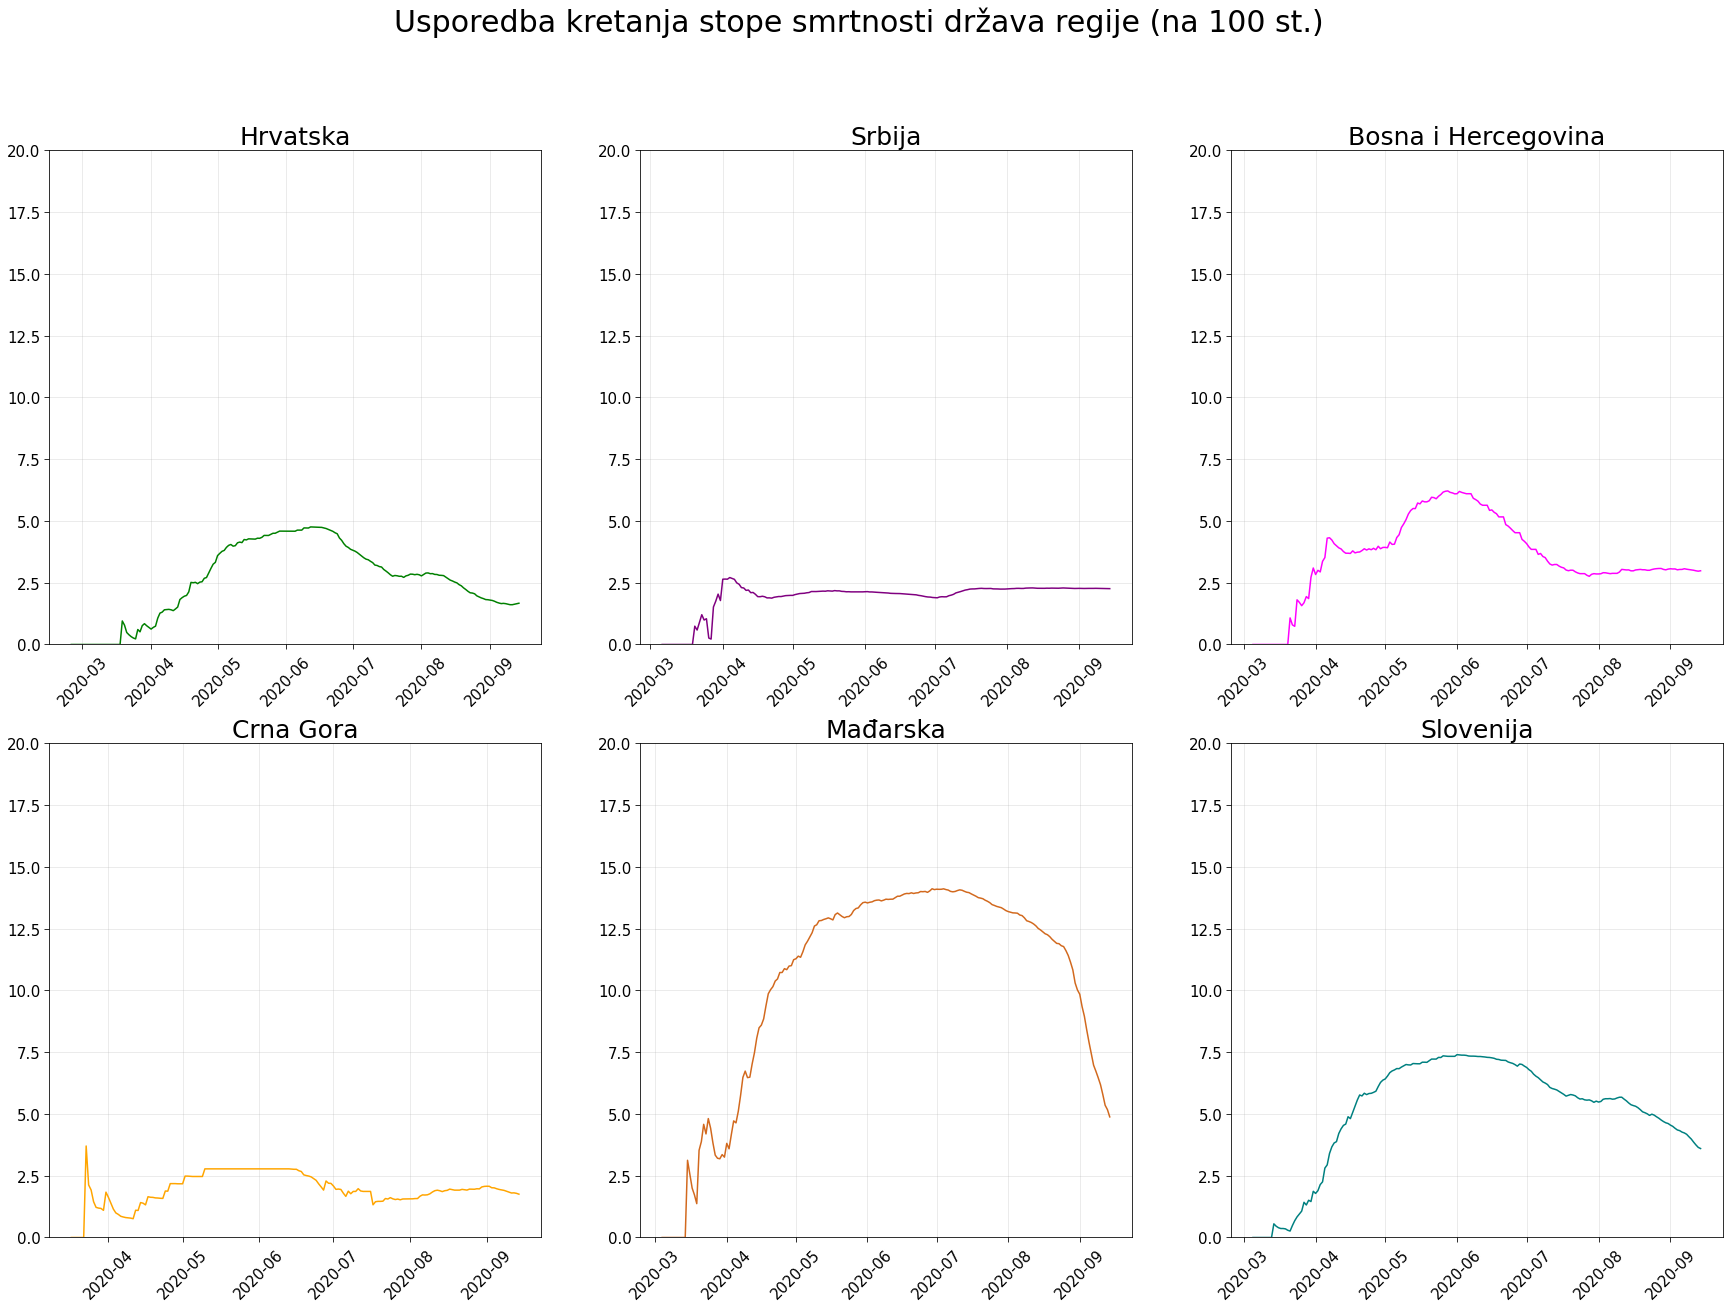

In [55]:
#100*df_latest_data["Deaths"]/df_latest_data["Confirmed"]
# Kreiranje grafikona
fig = plt.figure(figsize=(30,20))

fig.suptitle('Usporedba kretanja stope smrtnosti država regije (na 100 st.)', 
             fontsize=30)

# Podgraf 1
ax1 = fig.add_subplot(231)
ax1.set_title('Hrvatska',fontsize=25)
ax1.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax1.plot(df_croatia['Last_Update'],
         100*df_croatia["Deaths"]/df_croatia["Confirmed"], 
         color='green')

# Podgraf 2
ax2 = fig.add_subplot(232)
ax2.set_title('Srbija',fontsize=25)
ax2.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax2.plot(df_srb['Last_Update'],
         100*df_srb['Deaths']/df_srb["Confirmed"], 
         color='purple')

# Podgraf 3
ax3 = fig.add_subplot(233)
ax3.set_title('Bosna i Hercegovina',fontsize=25)
ax3.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax3.plot(df_bih['Last_Update'],
         100*df_bih['Deaths']/df_bih["Confirmed"], 
         color='magenta')

# Podgraf 4
ax4 = fig.add_subplot(234)
ax4.set_title('Crna Gora',fontsize=25)
ax4.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax4.plot(df_mne['Last_Update'],
         100*df_mne['Deaths']/df_mne["Confirmed"], 
         color='orange')

# Podgraf 5
ax5 = fig.add_subplot(235)
ax5.set_title('Mađarska',fontsize=25)
ax5.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax5.plot(df_hun["Last_Update"],
         100*df_hun["Deaths"]/df_hun["Confirmed"], 
         color='chocolate')

#Podgraf 6
ax6 = fig.add_subplot(236)
ax6.set_title('Slovenija',fontsize=25)
ax6.set_ylim(0,20)

plt.tick_params(size=5,labelsize = 15,rotation=45,axis='x')
plt.tick_params(size=5,labelsize = 15,axis='y')
plt.grid(alpha=0.3,which='both')
ax6.plot(df_slo["Last_Update"],
         100*df_slo["Deaths"]/df_slo["Confirmed"], 
         color='teal')


plt.show()

<hr style="border-color:##2c3e50 solid">

## <span style="color:#f39c12;font-weight:bolder">3. SKUP PODATAKA #3</span>
**Podaci o potvrđenim slučajevima**
    
<hr style="border-color:##2c3e50 solid">

Uvoz skupa podataka

In [56]:
df_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

<hr style="border-color:##2c3e50 solid">

###  <span style="color:#f39c12">3.1. Opis i analiza formata skupa #3
    
<hr style="border-color:##2c3e50 solid">

U varijablu df_confirmed, odnosno u pandas data frame uvezeni su podaci iz `.csv` datoteke `time_series_covid19_confirmed_global.csv`. Navedeni skup podataka sastoji se od **266** redova te (inicijalno) **230** stupaca. 

Data frame sadrži podatke o vrijednostima atributa koji kvantificira potvrđene slučajeve zaraze  po svakoj promatranoj državi od početka mjerenja, dakle **22. siječnja 2020.** godine pa nadalje. Dakle, retci data framea sačinjeni su od promatranih država, a stupci od datuma počevši od **22. siječnja .2020**.

In [57]:
df_confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720


In [58]:
# Preimenovanje stupaca
df_confirmed = df_confirmed.rename(columns={"Province/State":"State","Country/Region": "Country"})
df_confirmed.head(1)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772


<hr style="border-color:##2c3e50 solid">

### <span style="color:#f39c12">3.2. Tipovi podataka i potrošnja resursa

<hr style="border-color:##2c3e50 solid">

U nastavku vidimo prikaz informacija o data frameu. Kao što je ranije navedeno, radi se o trenutno 266 redaka i 229 stupaca što možemo vidjeti i pomoću atributa `shape` u nastavku:

In [59]:
df_confirmed.shape

(266, 241)

In [60]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 241 entries, State to 9/14/20
dtypes: float64(2), int64(237), object(2)
memory usage: 501.0+ KB


Kao što vidimo, data frame sadrži **266 zapisa**, odnosno redova. Isto tako sadrži i **229 stupaca**. Cijeli data frame zauzima **478+ KB** memorije u računalu.

In [61]:
# Metoda memory_usage() vraća memorijsku veličinu svakog stupca u bajtovima --> ovdje smo dijelili
# s 1e6 kako bismo dobili megabajte
df_confirmed.memory_usage()/1000000

Index      0.000128
State      0.002128
Country    0.002128
Lat        0.002128
Long       0.002128
             ...   
9/10/20    0.002128
9/11/20    0.002128
9/12/20    0.002128
9/13/20    0.002128
9/14/20    0.002128
Length: 242, dtype: float64

<hr style="border-color:##2c3e50 solid">

### <span style="color:#f39c12">3.3. Redukcija i optimizacija skupa #3
    
<hr style="border-color:##2c3e50 solid">

In [62]:
df_confirmed.drop(columns=["Lat","Long"],inplace=True)

In [63]:
df_confirmed["State"].fillna("Not available",inplace=True)

In [64]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 239 entries, State to 9/14/20
dtypes: int64(237), object(2)
memory usage: 496.8+ KB


In [65]:
df_confirmed.head(2)

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,Not available,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,Not available,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520


<hr style="border-color:##2c3e50 solid">

### <span style="color:#f39c12">3.4. Modeliranje skupa podataka</span>
**Analiza i obrada**
    
<hr style="border-color:##2c3e50 solid">

Prikažimo samo države koje **nemaju** dodijeljenu vrijednost atributa `Province/State`

In [66]:
df_confirmed[df_confirmed["State"] == "Not available"]

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,Not available,Afghanistan,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
1,Not available,Albania,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
2,Not available,Algeria,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
3,Not available,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
4,Not available,Angola,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Not available,West Bank and Gaza,0,0,0,0,0,0,0,0,...,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362
262,Not available,Western Sahara,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
263,Not available,Yemen,0,0,0,0,0,0,0,0,...,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013
264,Not available,Zambia,0,0,0,0,0,0,0,0,...,12709,12776,12836,12952,13112,13214,13323,13466,13539,13720


Prikažimo samo države koje **imaju** dodijeljenu vrijednost atributa `Province/State`

In [67]:
df_confirmed[df_confirmed["State"] != "Not available"]

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
8,Australian Capital Territory,Australia,0,0,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,0,0,0,0,3,4,4,4,...,4114,4118,4126,4135,4142,4152,4157,4166,4170,4177
10,Northern Territory,Australia,0,0,0,0,0,0,0,0,...,33,33,33,33,33,33,33,33,33,33
11,Queensland,Australia,0,0,0,0,0,0,0,1,...,1131,1133,1134,1143,1143,1145,1149,1149,1149,1150
12,South Australia,Australia,0,0,0,0,0,0,0,0,...,464,464,464,465,465,465,466,466,466,466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,Falkland Islands (Malvinas),United Kingdom,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
252,Gibraltar,United Kingdom,0,0,0,0,0,0,0,0,...,312,315,315,320,322,323,323,327,330,330
253,Isle of Man,United Kingdom,0,0,0,0,0,0,0,0,...,336,337,337,337,337,337,337,337,337,339
254,Montserrat,United Kingdom,0,0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13


**Grupirajmo države** i prikažimo samo sumarne podatke po svakoj državi distinktivno:

In [68]:
df_conf_grouped = df_confirmed.groupby("Country").sum()
df_conf_grouped

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38324,38398,38494,38520,38544,38572,38606,38641,38716,38772
Albania,0,0,0,0,0,0,0,0,0,0,...,10102,10255,10406,10553,10704,10860,11021,11185,11353,11520
Algeria,0,0,0,0,0,0,0,0,0,0,...,46071,46364,46653,46938,47216,47488,47752,48007,48254,48496
Andorra,0,0,0,0,0,0,0,0,0,0,...,1215,1215,1261,1261,1301,1301,1344,1344,1344,1438
Angola,0,0,0,0,0,0,0,0,0,0,...,2935,2965,2981,3033,3092,3217,3279,3335,3388,3439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,25575,26127,26779,27363,27919,28664,29256,29906,30574,31362
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
Yemen,0,0,0,0,0,0,0,0,0,0,...,1983,1987,1989,1994,1999,2003,2007,2009,2011,2013


### <span style="color:#f39c12">GRAF 3.1</span>
Prikažimo rezultate broja potvrđenih slučajeva za **Republiku Hrvatsku** u periodu od 22. siječnja do najnovijih podataka:

In [69]:
cro_T = pd.DataFrame(df_conf_grouped.loc["Croatia"])
cro_T

,Croatia
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
9/10/20,12917
9/11/20,13107
9/12/20,13368
9/13/20,13533


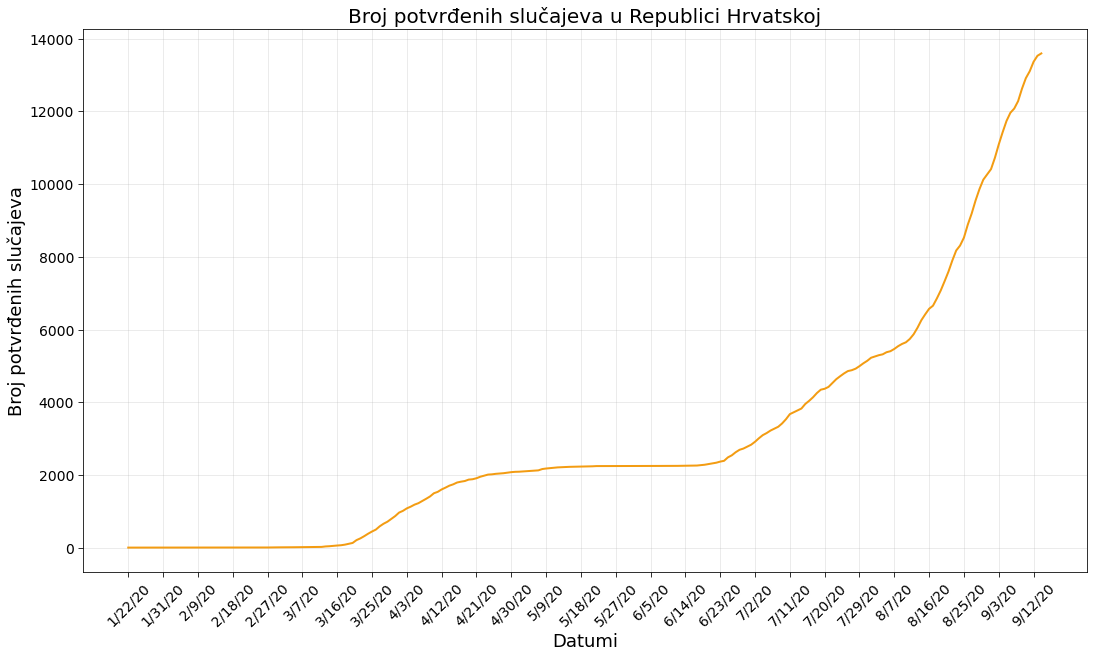

In [70]:
f = plt.figure(figsize=(18,10))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.plot(cro_T.index,cro_T, c="#f39c12", linewidth=2, linestyle='-')
plt.tick_params(size=5, labelsize = 14)
plt.xticks(list(np.arange(0,len(cro_T.index),int(len(cro_T.index)/25))),rotation=45)

plt.xlabel("Datumi",fontsize=18)
plt.ylabel("Broj potvrđenih slučajeva",fontsize=18)
plt.title("Broj potvrđenih slučajeva u Republici Hrvatskoj",fontsize=20)
plt.grid(alpha = 0.3,which='both')
plt.show()

### <span style="color:#f39c12">GRAF 3.2</span>
Graf pojava prvog slučaja zaraze po državama:

In [71]:
affected_countries = df_confirmed.groupby("Country").sum().apply(lambda x: x[x > 0].count(), axis =0)
dt = affected_countries.index

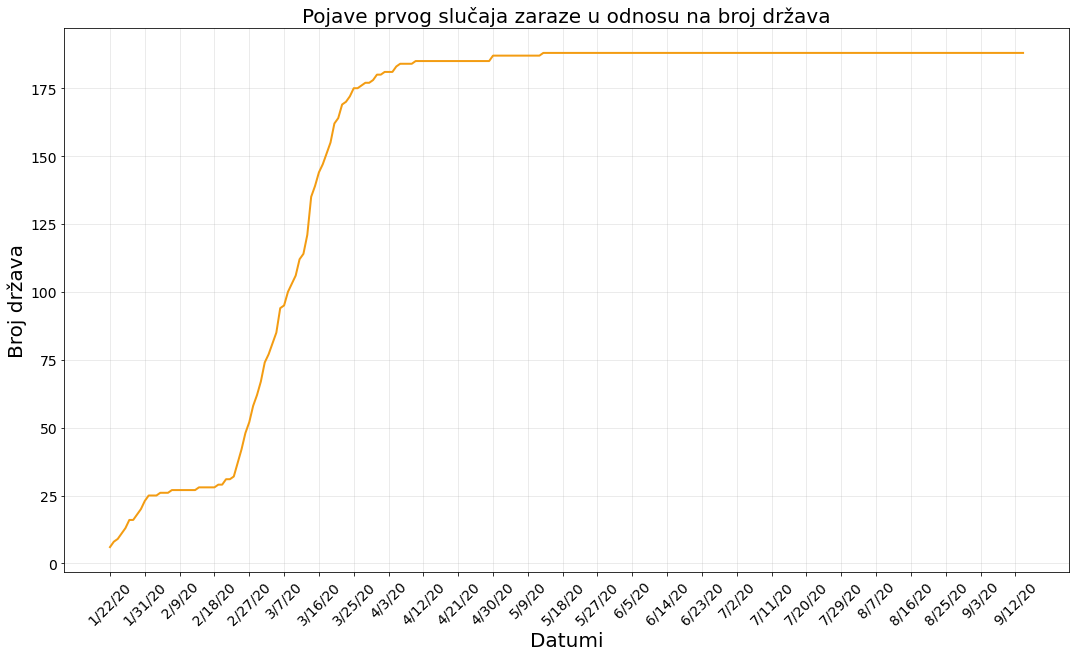

In [72]:
f = plt.figure(figsize=(18,10))
f.add_subplot(111)
plt.plot(dt, affected_countries, c="#f39c12",linewidth=2, linestyle='-')
plt.tick_params(labelsize = 14)
plt.xticks(list(np.arange(0,len(dt),int(len(dt)/25))), rotation=45)

#labels
plt.xlabel("Datumi",fontsize=20)
plt.ylabel("Broj država",fontsize=20)
plt.title("Pojave prvog slučaja zaraze u odnosu na broj država",fontsize=20)
plt.grid(alpha = 0.3)


### <span style="color:#f39c12">GRAF 3.3</span>
**Dnevni prirast** broja potvrđenih slučajeva po nekoliko izdvojenih država:

In [73]:
df_confirmed.groupby("Country").sum().diff(axis=1).sort_values(df_confirmed.columns[-1],ascending =False).head(10).replace(np.nan,0)

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
Country,,,,,,,,,,,,,,,,,,,,,
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,...,44452.0,31395.0,24257.0,26387.0,33203.0,35888.0,47552.0,41471.0,34450.0,34079.0
Spain,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,26560.0,8964.0,8866.0,10764.0,12183.0,0.0,0.0,27404.0
France,0.0,0.0,2.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,19906.0,6544.0,9574.0,8951.0,9647.0,921.0,82.0,22977.0
Brazil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,31199.0,14521.0,10273.0,14279.0,35816.0,40557.0,43718.0,33523.0,14768.0,15155.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9924.0,6986.0,9215.0,12027.0,12259.0,11905.0,11507.0,10776.0,9056.0,9909.0
Peru,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6703.0,6854.0,6275.0,1598.0,4615.0,6586.0,7291.0,6603.0,6162.0,6787.0
Colombia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8393.0,8065.0,5327.0,-315.0,15318.0,7813.0,7424.0,6876.0,7355.0,5573.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,5144.0,5097.0,5106.0,5020.0,5172.0,5310.0,5421.0,5406.0,5361.0,5414.0
Israel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2517.0,1708.0,3331.0,3590.0,3532.0,4429.0,3038.0,4158.0,2882.0,4764.0


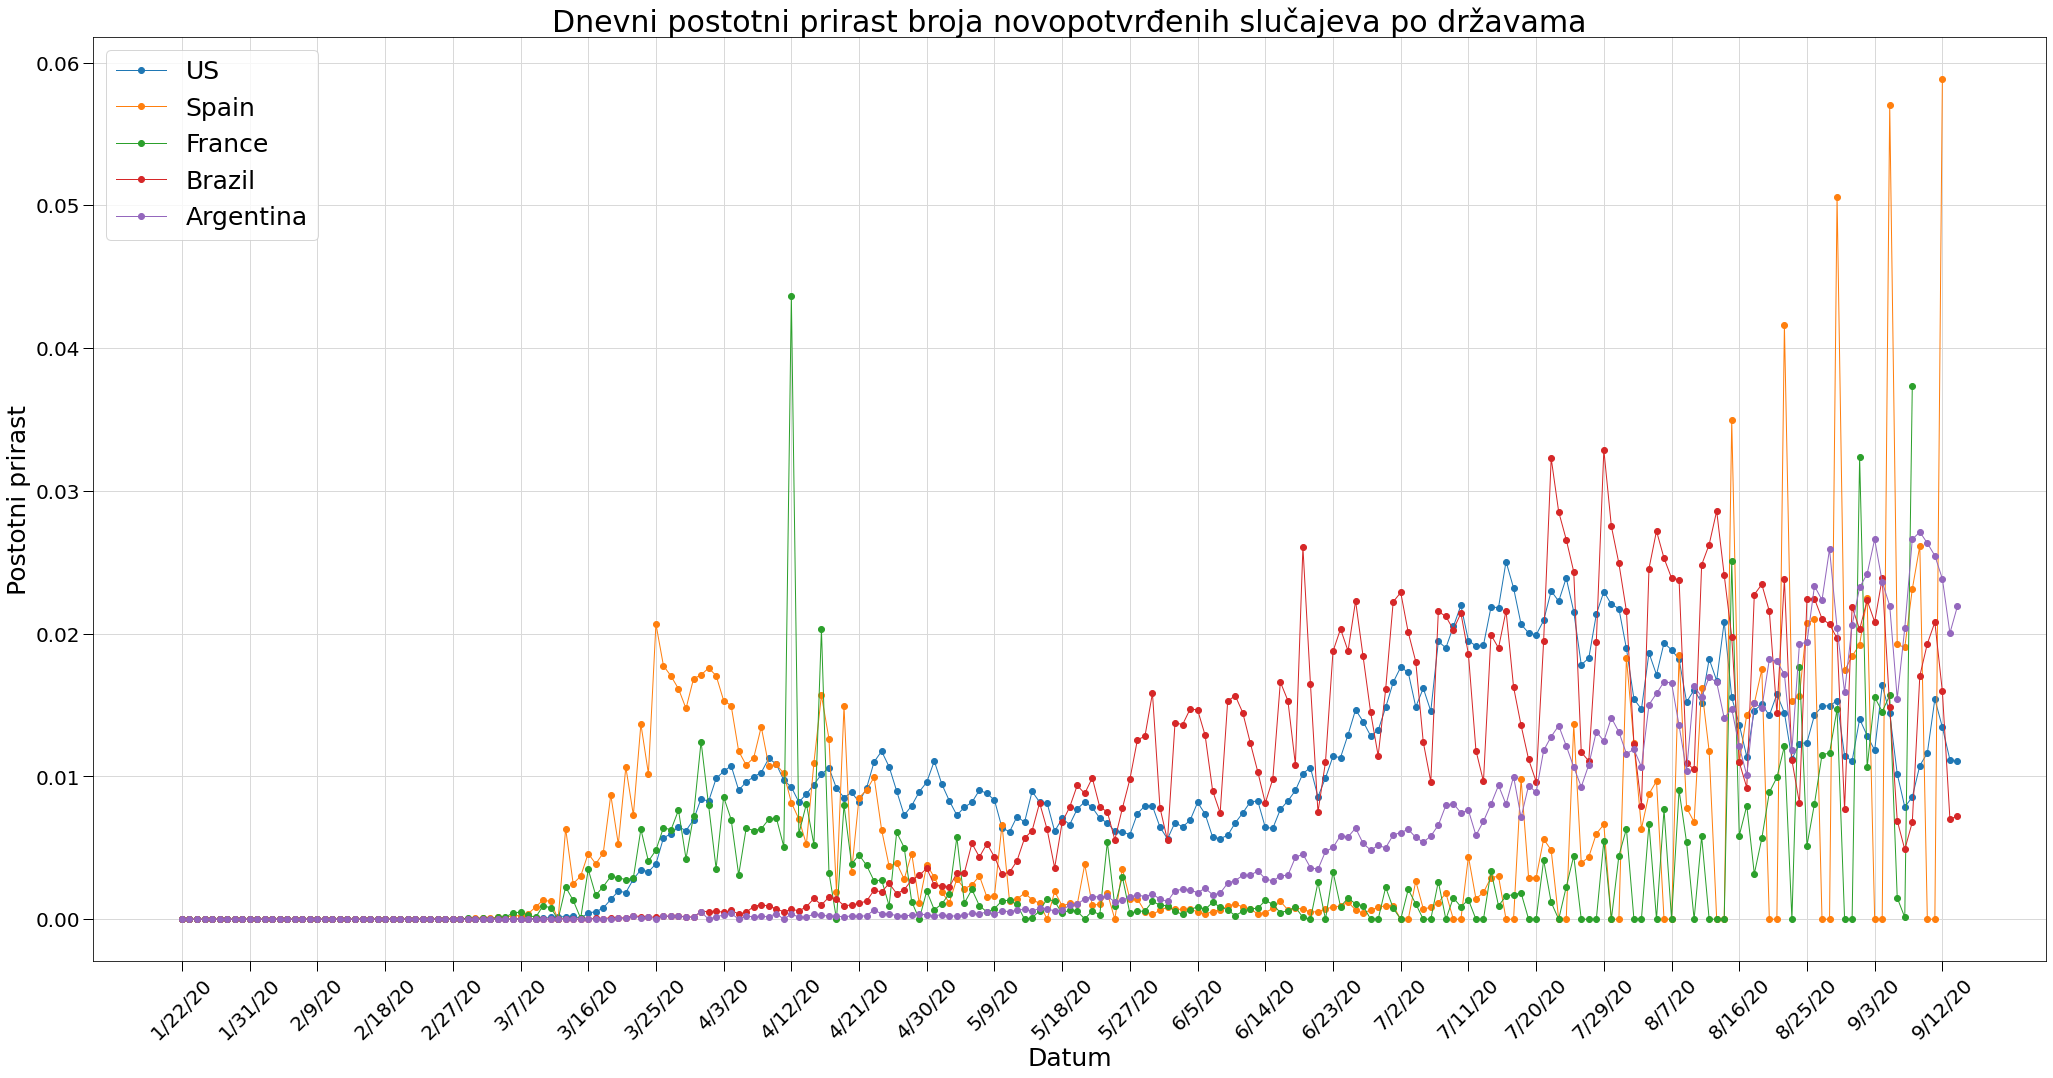

In [74]:
dfGrowth = df_confirmed.groupby('Country').sum().diff(axis='columns').sort_values(df_confirmed.columns[-1],ascending =False).head(5).replace(np.nan,0)
dts = dfGrowth.columns
pop = {
    "Brazil": 210147125,
    "US": 308401808,
    "Spain": 46572028,
    "France": 61538322,
    "Argentina":45195774,
    "Peru": 33105097,
    "Colombia":49996445,
    "Russia":142856536,
    "Israel": 7412200,
    "Philippines":106741697 
}

f = plt.figure(figsize=(35,17))
ax = f.add_subplot(111)

for i,country in enumerate(dfGrowth.index):            # dfGrowth.index su države
    t = dfGrowth.loc[dfGrowth.index == country].values[0]
    t = t[t>=0]
    
    date = np.arange(0,len(t[:]))
    plt.plot(date,(t/pop[country])*100,'-o',label = country,linewidth =1)
    
plt.xticks(list(np.arange(0,len(dts),int(len(dts)/25))),dts[:-1:int(len(dts)/25)])

plt.tick_params(which='both', width=1,labelsize=20,length=10)
plt.xticks(rotation=45)

ax.grid(lw = 1, ls = '-', c = "0.85", which = 'major')
ax.grid(lw = 1, ls = '-', c = "0.95", which = 'minor')

plt.title("Dnevni postotni prirast broja novopotvrđenih slučajeva po državama",fontsize=30)


plt.xlabel("Datum",fontsize =25)
plt.ylabel("Postotni prirast",fontsize =25)

plt.legend(fontsize=25) 

## <span style="color:#2980b9;font-weight:bolder">4.  Skup podataka #4</span>
**Podaci o smrtnim slučajevima**

Uvoz skupa podataka

In [75]:
df_deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

<hr style="border-color:##2c3e50 solid">

### <span style="color:#2980b9">4.1. Opis i analiza formata skupa #4
    
<hr style="border-color:##2c3e50 solid">

U varijablu df_deaths, odnosno u pandas data frame uvezeni su podaci iz `.csv` datoteke `time_series_covid19_deaths_global.csv`. Navedeni skup podataka sastoji se od **266** redova te (inicijalno) **230** stupaca. 

Data frame sadrži podatke o vrijednostima atributa koji kvantificira smrtne slučajeve po svakoj promatranoj državi od početka mjerenja, dakle **22. siječnja 2020.** godine pa nadalje. Dakle, retci data framea sačinjeni su od promatranih država, a stupci od datuma počevši od **22. siječnja .2020**.

In [76]:
df_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,312,316,319,321,322,324,327,330,334,338
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,117,117,120,124,126,130,131,132,134,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,177,181,184,190,192,198,204,210,221,226
262,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,572,572,573,576,576,580,582,582,583,583
264,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,292,295,295,297,300,300,306,312,312,320


In [77]:
df_deaths = df_deaths.rename(columns={"Province/State":"State","Country/Region": "Country"})
df_deaths.head(1)

,State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425


<hr style="border-color:##2c3e50 solid">

### <span style="color:#2980b9">4.2. Tipovi podataka i potrošnja resursa
    
<hr style="border-color:##2c3e50 solid">

U nastavku vidimo prikaz informacija o data frameu. Kao što je ranije navedeno, radi se o trenutno 266 redaka i 229 stupaca što možemo vidjeti i pomoću atributa `shape` u nastavku:

In [78]:
df_deaths.shape

(266, 241)

In [79]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 241 entries, State to 9/14/20
dtypes: float64(2), int64(237), object(2)
memory usage: 501.0+ KB


Kao što vidimo, data frame sadrži **266 zapisa**, odnosno redova. Isto tako sadrži i **230 stupaca**. Cijeli data frame zauzima **478.1+ KB** memorije u računalu.

In [80]:
# Metoda memory_usage() vraća memorijsku veličinu svakog stupca u bajtovima --> ovdje smo dijelili
# s 1e6 kako bismo dobili megabajte
df_confirmed.memory_usage()/1000000

Index      0.000128
State      0.002128
Country    0.002128
1/22/20    0.002128
1/23/20    0.002128
             ...   
9/10/20    0.002128
9/11/20    0.002128
9/12/20    0.002128
9/13/20    0.002128
9/14/20    0.002128
Length: 240, dtype: float64

<hr style="border-color:##2c3e50 solid">

### <span style="color:#2980b9">4.3. Redukcija i optimizacija skupa #4
    
<hr style="border-color:##2c3e50 solid">

In [81]:
df_deaths.drop(columns=["Lat","Long"],inplace=True)

In [82]:
df_deaths["State"].fillna("Not available",inplace=True)

In [83]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 239 entries, State to 9/14/20
dtypes: int64(237), object(2)
memory usage: 496.8+ KB


In [84]:
df_deaths.head(2)

,State,Country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
0,Not available,Afghanistan,0,0,0,0,0,0,0,0,...,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425
1,Not available,Albania,0,0,0,0,0,0,0,0,...,312,316,319,321,322,324,327,330,334,338


<hr style="border-color:##2c3e50 solid">

### <span style="color:#2980b9">4.4. Modeliranje skupa podataka</span>
**Analiza i obrada**
<hr style="border-color:##2c3e50 solid">

### <span style="color:#2980b9">GRAF 4.1.</span>
**Apsolutno kretanje broja potvrđenih i smrtnih slučajeva u Republici Hrvatskoj**:

In [85]:
df_death_grouped = df_deaths.groupby("Country").sum()
df_death_grouped

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20,9/14/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1409,1412,1415,1418,1420,1420,1420,1420,1420,1425
Albania,0,0,0,0,0,0,0,0,0,0,...,312,316,319,321,322,324,327,330,334,338
Algeria,0,0,0,0,0,0,0,0,0,0,...,1549,1556,1562,1571,1581,1591,1599,1605,1612,1620
Andorra,0,0,0,0,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
Angola,0,0,0,0,0,0,0,0,0,0,...,117,117,120,124,126,130,131,132,134,136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,177,181,184,190,192,198,204,210,221,226
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
Yemen,0,0,0,0,0,0,0,0,0,0,...,572,572,573,576,576,580,582,582,583,583


In [86]:
cro_deaths_T = pd.DataFrame(df_death_grouped.loc["Croatia"])
cro_deaths_T

,Croatia
1/22/20,0
1/23/20,0
1/24/20,0
1/25/20,0
1/26/20,0
...,...
9/10/20,208
9/11/20,211
9/12/20,218
9/13/20,224


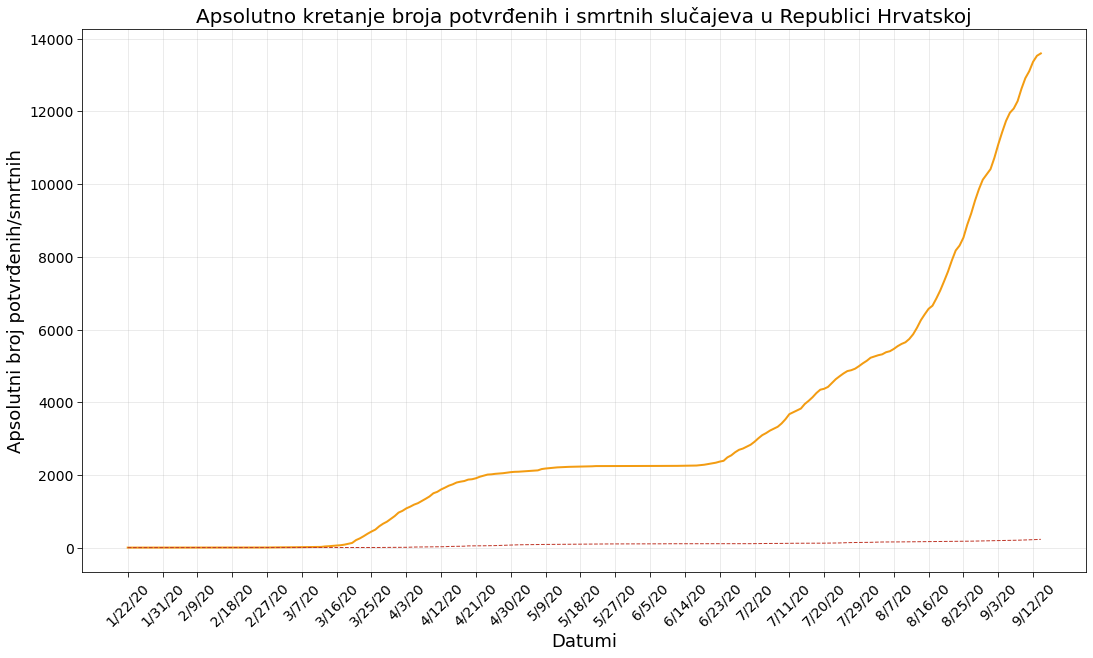

In [87]:
f = plt.figure(figsize=(18,10))
f.add_subplot(111)

plt.axes(axisbelow=True)
plt.plot(cro_T.index,cro_T, c="#f39c12", linewidth=2, linestyle='-')
plt.plot(cro_deaths_T.index,cro_deaths_T, c="#c0392b", linewidth=1, linestyle='--')
plt.tick_params(size=5, labelsize = 14)
plt.xticks(list(np.arange(0,len(cro_T.index),int(len(cro_T.index)/25))),rotation=45)

plt.xlabel("Datumi",fontsize=18)
plt.ylabel("Apsolutni broj potvrđenih/smrtnih",fontsize=18)
plt.title("Apsolutno kretanje broja potvrđenih i smrtnih slučajeva u Republici Hrvatskoj",fontsize=20)
plt.grid(alpha = 0.3,which='both')
plt.show()